# TCR Repertoire Analysis for Alignment 

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

In [2]:
def make_unique(data: list, sep='-'):
    """Take in a list of strings and makes any duplicate strings unqiue.
    It does this by appending the occurence count of each duplicate string to itself with the 'sep' arg if provided.
    
    ex.)
        x = ['a', 'a', 'a', 'b', 'c']
        out = make_unique(x)
        print(out)  # ['a', 'a-1', 'a-2', 'b', 'c']

    Args:
        data (list): an iterable that can be interpreted as a list with all elements being strings
        sep (str, optional): what to use to separate the appened unique counts with. Defaults to '-'.

    Returns:
        list: new list with all unique elements
    """
    new_list = list(data).copy()
    unique_values = np.unique(new_list)
    unique_counts = { val: 0 for val in unique_values }
    for ind, value in enumerate(new_list):
        if unique_counts[value] != 0:
            new_list[ind] = f"{value}{sep}{unique_counts[value]}"
        unique_counts[value] = unique_counts[value] + 1
    return new_list


## Input args

In [3]:
input_file = Path('scRepertoire_outs/scaledClonotypeAbundance.csv')
fasta_file = Path('input.fa')

# dna_output = Path("output/DNA-scaledClonotypeAbundance/")
# dna_output.mkdir(exist_ok=True)
# output = dna_output
# translate = False

aa_output = Path("output/AA-scaledClonotypeAbundance/")
aa_output.mkdir(exist_ok=True)
output = aa_output
translate = True

## Process data into fasta file

In [10]:
# read csv
file_df = pd.read_csv(input_file)

# separate 'CTstrict' into 'alpha regions', 'alpha chain', 'beta region', 'beta chain'
file_df[['alpha region', 'alpha chain', 'beta region', 'beta chain']] = file_df['CTstrict'].str.split('_', 4, expand=True)

# combine 'alpha chain' and 'beta chain'
file_df['seq'] = file_df['alpha chain'] + file_df['beta chain']

# save TCR info for the id of SeqRecord
file_df['desc'] = file_df[['alpha region', 'beta region']].agg('-'.join, axis=1)

# make 'values' unique for SeqRecord name
file_df['id'] = make_unique(file_df['values'], '|')

# make into fasta file
file_df['seq'] = file_df['seq'].apply(Seq)

# can translate into proteins with .translate()
if translate:
    file_df['seq'] = file_df['seq'].apply(lambda x: x.translate())

fasta_data = file_df.apply(lambda row: SeqRecord(row['seq'], id=row['id'], description=row['desc']), axis=1)

print(fasta_data[0].format("fasta"))

fasta_data = fasta_data.tolist()

print(fasta_data[0])

# save fasta file
SeqIO.write(fasta_data, output / fasta_file, 'fasta')

# # if to read in fast file
# SeqIO.parse(output / fasta_file, 'fasta')

>TMEV_pilot_CD45 TRAV1.TRAJ13.TRAC-TRBV19.TRBJ2-3..TRBC2
CAVRERGSGTYQRFCASSDSAETLYF

ID: TMEV_pilot_CD45
Name: <unknown name>
Description: TRAV1.TRAJ13.TRAC-TRBV19.TRBJ2-3..TRBC2
Number of features: 0
Seq('CAVRERGSGTYQRFCASSDSAETLYF')


4293

## Run multiple sequence alignment and create tree

In [ ]:
# run from command align after downloading clustalo-1.2.4
"""
cd /mnt/c/Users/Mathew/My\ Drive/LauraRogers/TCR_Repertoire/output/<output_dir>/

~/./clustalo-1.2.4 -v --full --force --threads 8 --output-order input-order --distmat-out aligned.dm -i input.fa -o aligned.fa

~/./FastTree aligned.fa > fast_tree.nwk
"""

## View alignment

In [92]:
from Bio import AlignIO

aligned_fasta_file = output / "aligned.fa"

# read in aligned TCRs
aligned_fasta = AlignIO.read(aligned_fasta_file, 'fasta')
print(aligned_fasta)

Alignment with 4293 rows and 61 columns
CAVR------------E--RGSGTYQRFCASS-DSA-E-T----...--- TMEV_pilot_CD45
CAVR------------D--RNSGTYQRFCASR-ESG-T-E----...--- TMEV_pilot_CD45|1
CAVR------------D--RNSGTYQRFCASS-IGA-E-T----...--- TMEV_pilot_CD45|2
---CA----V--R---V--TSSGQKLVFCASS-LV-QN------...--- TMEV_pilot_CD45|3
---CA----V--R---V--TSSGQKLVFCASS-LV-QN------...--- TMEV_pilot_CD45|4
CAVR-----D--R---T--NSAGNKLTFCASS-L----------...--- TMEV_pilot_CD45|5
CAVR-----D--R---T--NSAGNKLTFCASS-M----------...--- TMEV_pilot_CD45|6
----C-A--V--N---R--GSALGRLHFCASR-NR----DW---...--- TMEV_pilot_CD45|7
---CA-V--R--D---R--GSALGRLHFCTCS-AD----RA---...--- TMEV_pilot_CD45|8
---CA-V--R--D---R--GSALGRLHFCTCS-AG----RD---...--- TMEV_pilot_CD45|9
--CAV----R--D---R--GSALGRLHFCASS-PGHPL-S----...--- TMEV_pilot_CD45|10
--CAV----R--D---R--GSALGRLHFCASS-FP-DI-S----...--- TMEV_pilot_CD45|11
CAVRD--------------RSNYNVLYFCASS-LS-Q-------...--- TMEV_pilot_CD45|12
--CAV----R------G--MSNYNVLYFCASS-QDRRE------...--- TMEV_pilot_

## View Tree

In [55]:
from Bio import Phylo
import seaborn as sns

sns.set_theme()
sns.set(rc={"figure.figsize":(16, 12)})

In [ ]:
# tree_file = output / "tree.nwk"
# tree = Phylo.read(tree_file, format='newick')
# Phylo.draw(tree)

In [ ]:
# import pylab
# import networkx

# net = Phylo.to_networkx(tree)

# networkx.draw(net)
# pylab.show()

I believe that these sequences are so closely related, it makes them difficult to plot and especially so for a large number of samples

## Or create tree in Biopython?

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor, DistanceMatrix
from Bio import Phylo

seqs = [str(x.seq) for x in fasta_data]
seqs = np.array(seqs).reshape(-1, 1)
seqs_id = [str(x.id) for x in fasta_data]
tcr_names_unique = np.array(seqs_id)
tcr_names_general = np.array([ x.split("|")[0] for x in seqs_id] )

# calculator = DistanceCalculator('identity')
# dm = calculator.get_distance(aligned_fasta)

# constructor = DistanceTreeConstructor(calculator, 'nj')
# tree = constructor.build_tree(aligned_fasta)
# print(tree)
# Phylo.write(tree, "biopython-nj.nwk", "newick")

takes way too long to do it all in biopython

So I'll try creating a distance matrix of the TCR reads and then clustering into a dendrogram

In [24]:
# # or use a different distance matrix using Levenshtein
# from Levenshtein import ratio as lev_ratio
# from Levenshtein import distance as lev_dist
# from scipy.spatial.distance import pdist, squareform

# def dist_lev(u, v):
#     return lev_dist(u[0], v[0])

# def ratio_lev(u, v):
#     return lev_ratio(u[0], v[0])

# dist_lev_flat = pdist(seqs, dist_lev)
# ratio_lev_flat = pdist(seqs, ratio_lev)

# dist_lev_square = squareform(dist_lev_flat)
# ratio_lev_square = squareform(ratio_lev_flat)

even with distance matrix already made, this also takes crazy long

In [ ]:
# lev_square = squareform(lev_flat)
# ind_tril = np.tril_indices(len(lev_square))
# lev_tril_flat = lev_square[ind_tril]

# dm_input = [ [] for x in range(len(lev_square)) ]
# ind = 0
# for i in range(len(lev_square)):
#     for j in range(i + 1):
#         dm_input[i].append(lev_tril_flat[ind])
#         ind = ind + 1
        
# # stupid how it wants an inefficient list of lists...just use numpy array with tril_indices like I did!
# # now I know why this takes so long to run the DistanceCalculator and DistanceTreeConstructor
# # I should really think about forking and pull requesting a better version for Biopython
# lev_dm = DistanceMatrix(names=seqs_id, matrix=dm_input)

# constructor = DistanceTreeConstructor()

# # this also takes crazy long
# tree = constructor.nj(lev_dm)
# print(tree)

## Read in clustalo distance matrix

In [93]:
clustalo_dm = output / "aligned.dm"
with open(clustalo_dm) as f:
    f.readline()
    lines = f.readlines()
    aligned_dm = np.array([ line.split() for line in lines ])

aligned_names = aligned_dm[:, 0]
aligned_dm = aligned_dm[:, 1:].astype(float)

print(aligned_names.shape, aligned_dm.shape)


# clustalo_clust = output / "aligned.clust"
# with open(clustalo_dm) as f:
#     f.readline()
#     lines = f.readlines()
#     aligned_clust = np.array([ line.split() for line in lines ])

(4293,) (4293, 4293)


## Cluster and visualize distance/identity matrix with heatmap

I'm finding it hard to visualize such a large group (4000+) of TCRs with the classic dendrogram.

I'll instead cluster the levenshtein distances from the TCR reads and then visualize

But first visualize the distance matrix

[['TMEV_pilot_CD45' '1122']
 ['TMEV_pilot_CD4/CD8' '1651']
 ['Inhibitor_Aak1i' '753']
 ['Inhibitor_Ctrl' '767']]


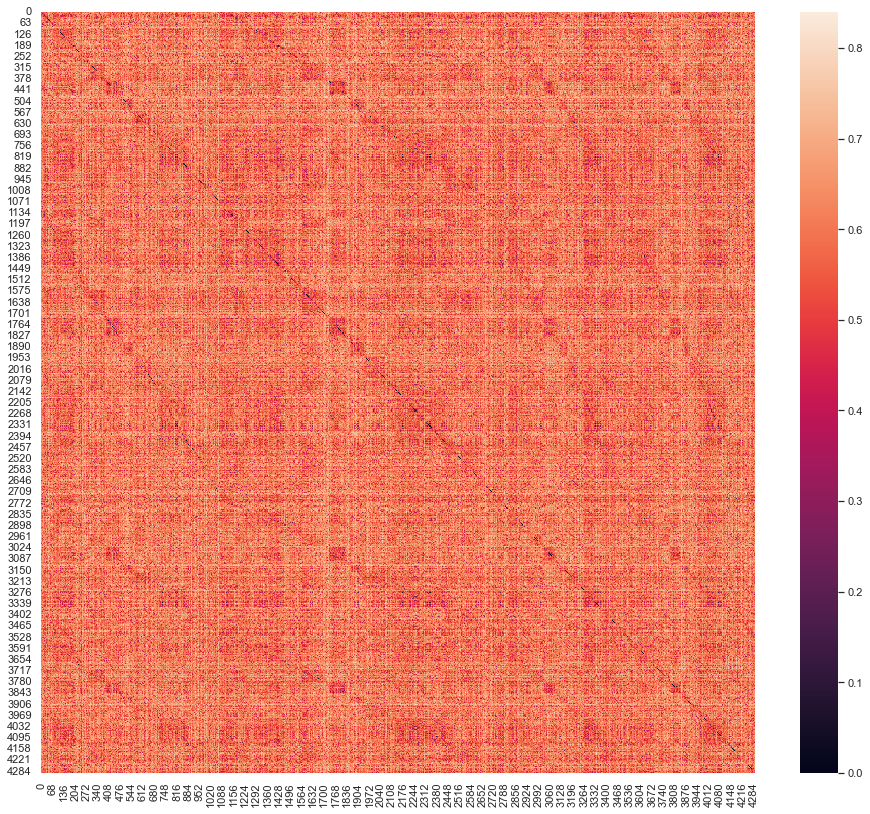

In [86]:
unique_counts = np.array(np.unique(tcr_names_general, return_counts=True)).T
# ordered as TMEV_pilot_CD45, TMEV_pilot_CD4/CD8, Inhibitor_Aak1i, Inhibitor_Ctrl
print(unique_counts[[3, 2, 0, 1]])
sns.heatmap(aligned_dm)
plt.savefig(output / 'heatmap-dist.png', facecolor='w')

## Cluster the distance matrix

Perform ward linkage of levenshtein distances as 'Z' (such is the scipy convention)

Then hierarchical clustering of ward linkage so that there are only 4 clusters created.

4 is used since that is how many types we have, however, 5 wouldn't be too bad so that there is an "other" class for outliers

number of TCR types
[['TMEV_pilot_CD45' '1122']
 ['TMEV_pilot_CD4/CD8' '1651']
 ['Inhibitor_Aak1i' '753']
 ['Inhibitor_Ctrl' '767']]


c:\Users\Mathew\miniconda3\envs\bicb\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


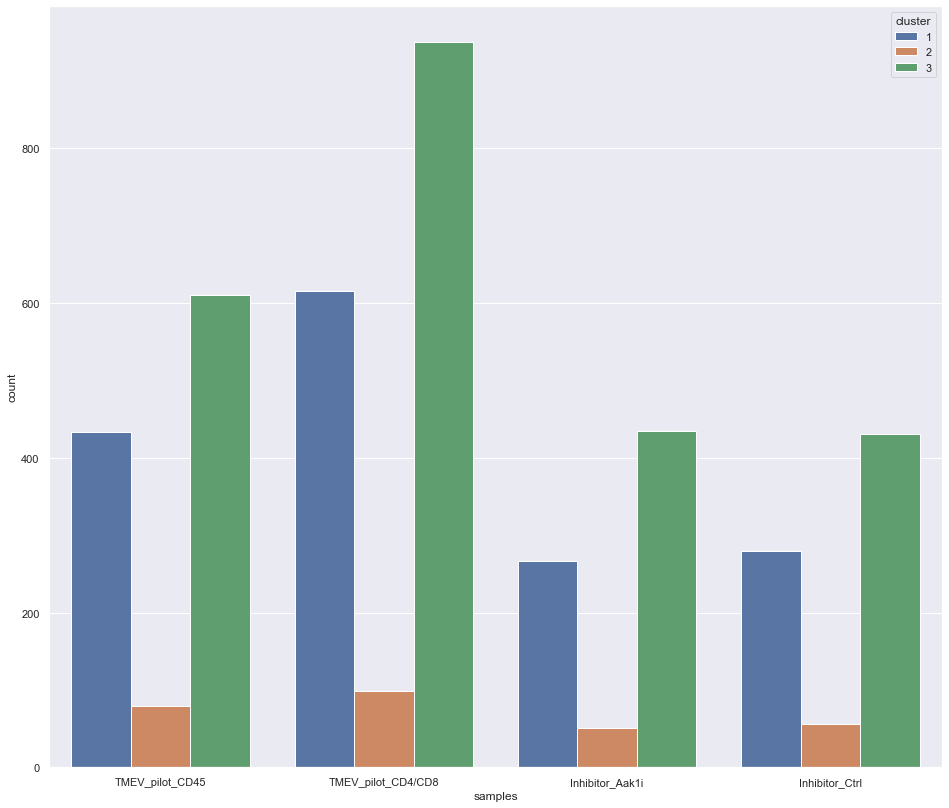

In [94]:
from scipy.cluster import hierarchy
import seaborn as sns
n_cluster = 3

unique_counts = np.array(np.unique(tcr_names_general, return_counts=True)).T
# ordered as TMEV_pilot_CD45, TMEV_pilot_CD4/CD8, Inhibitor_Aak1i, Inhibitor_Ctrl
print('number of TCR types')
print(unique_counts[[3, 2, 0, 1]])

# could be an issue using ward clustering on levenshtein ratios, maybe distances is ok? (not euclidien)
Z = hierarchy.ward(aligned_dm)
cluster_assn = hierarchy.fcluster(Z, t=n_cluster, criterion='maxclust')

sns.set_theme()
tcr_clust = pd.DataFrame({'samples': tcr_names_general, 'cluster': cluster_assn})
sns.countplot(data=tcr_clust, x='samples', hue='cluster')
plt.savefig(output / 'count-clusters.png', facecolor='w')

# output the cluster assignments
tcr_clust2 = pd.DataFrame({'ID': tcr_names_unique, 'cluster': cluster_assn})
tcr_clust2.to_csv(output / f"cluster-{n_cluster}-assignment.csv", index=False, header=False)

small_clust = tcr_clust2[tcr_clust2['cluster'] == 2]
small_clust.to_csv(output / f"cluster-small.csv", index=False, header=False)

In general, for total cluster sizes between 3-5 results in a similar distribution. There are always two major clusters, and after that are simply minor clusters

clustering with 6 and above ends up splitting the larger two clusters into 3, 

## Visualize ward clustering of distances with clustermap

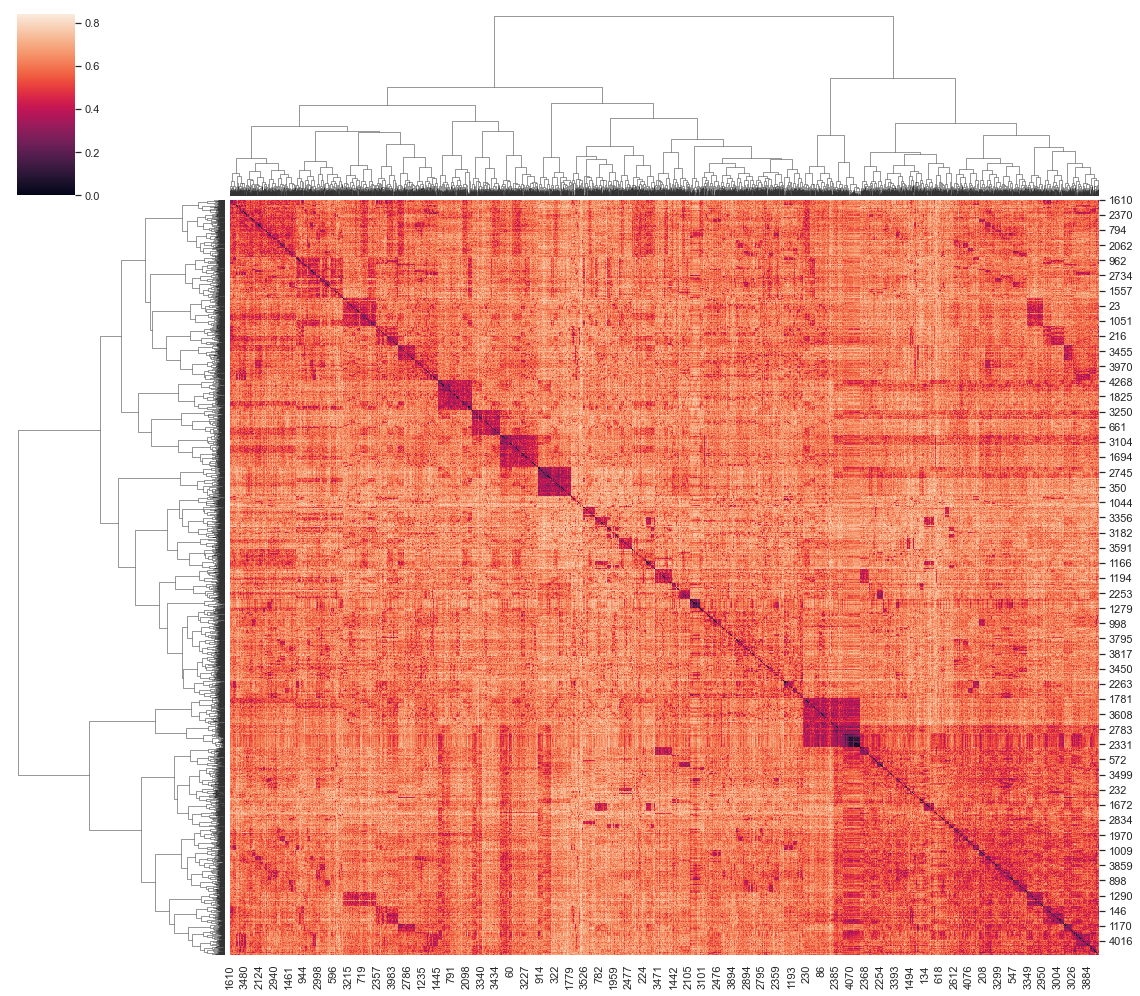

In [88]:
sns.set_theme()
sns.clustermap(aligned_dm, row_linkage=Z, col_linkage=Z, figsize=(16, 14))
plt.savefig(output / 'clustermap-dist.png', facecolor='w')


## PCA plot of distance

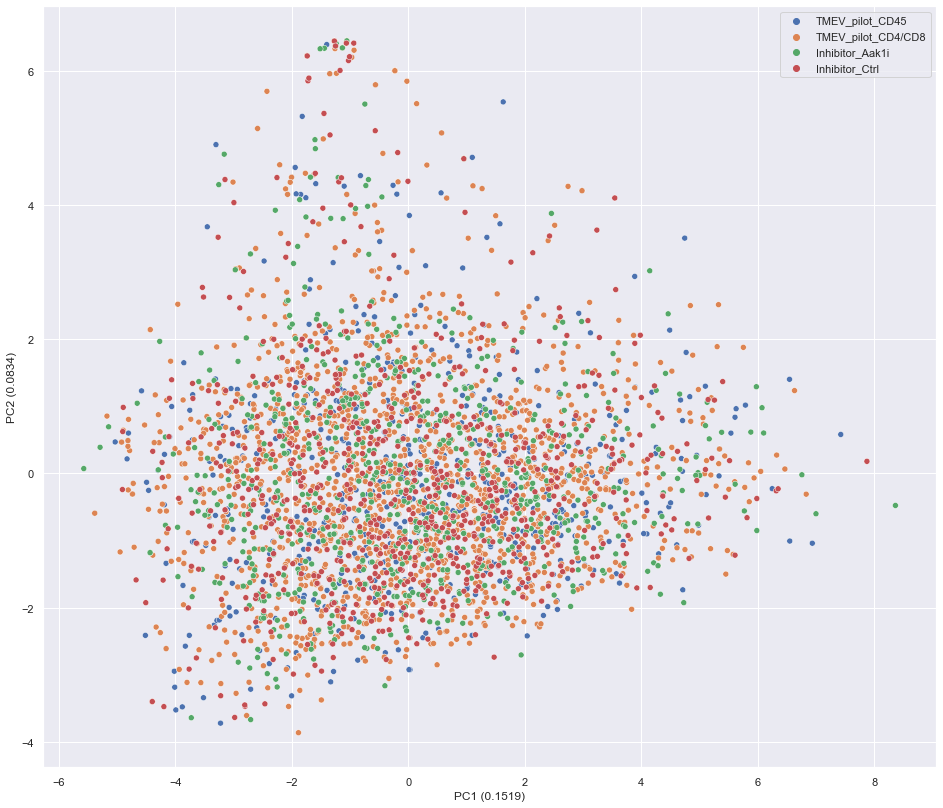

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit_transform(aligned_dm)


sns.set_theme(style='whitegrid')
sns.set(rc={"figure.figsize":(16, 14)})

g = sns.scatterplot(x=X_r[:,0], y=X_r[:,1], hue=tcr_names_general)
g.set_ylabel(f'PC2 ({round(pca.explained_variance_ratio_[1], 4)})')
g.set_xlabel(f'PC1 ({round(pca.explained_variance_ratio_[0], 4)})')

plt.savefig(output / 'PCA-dist.png', facecolor='w')